# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import numpy as np

import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print (X_train.shape)

(60000, 28, 28)


Text(0.5,1,'6')

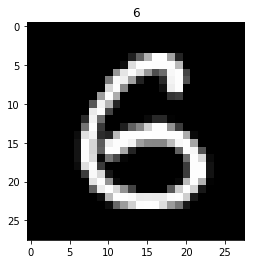

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

random_value = np.random.randint(low=0, high=len(X_train), dtype='int64')

plt.imshow(X_train[random_value], cmap='gray')
plt.title(y_train[random_value])

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [8]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [10]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [11]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
from keras.layers import Activation
model_1 = Sequential()
 
model_1.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #26
model_1.add(Convolution2D(64, 3, 3, activation='relu')) #24
model_1.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid')) #12
model_1.add(Convolution2D(128, 3, 3)) # 10
model_1.add(Convolution2D(10, 1, 1, activation='relu'))
model_1.add(Convolution2D(10, 10))
model_1.add(Flatten())
model_1.add(Activation('softmax'))

c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  after removing the cwd from sys.path.
c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  """
c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3))`
  import sys
c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  


In [15]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 10)        1290      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
__________

In [16]:
model_1.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
model_1.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 44s 736us/step - loss: 0.1407 - acc: 0.9570
Epoch 2/10
60000/60000 [==============================] - 40s 662us/step - loss: 0.0538 - acc: 0.9832
Epoch 3/10
60000/60000 [==============================] - 39s 646us/step - loss: 0.0418 - acc: 0.9869
Epoch 4/10
60000/60000 [==============================] - 39s 649us/step - loss: 0.0343 - acc: 0.9894
Epoch 5/10
60000/60000 [==============================] - 43s 712us/step - loss: 0.0278 - acc: 0.9915
Epoch 6/10
60000/60000 [==============================] - 45s 756us/step - loss: 0.0241 - acc: 0.9921
Epoch 7/10
60000/60000 [==============================] - 45s 747us/step - loss: 0.0207 - acc: 0.9936
Epoch 8/10
60000/60000 [==============================] - 45s 754us/step - loss: 0.0186 - acc: 0.9938
Epoch 9/10
60000/60000 [==============================] - 46s 760us/step - loss: 0.0160 - acc: 0.9948
Epoch 10/10
60000/60000 [==============================] - 45s 749us/step - loss: 

In [18]:
score = model_1.evaluate(X_test, Y_test, verbose=0)

In [19]:
print(score)

[0.04538431865724042, 0.9885]


**with Conv2D**

In [20]:
from keras.layers import Activation
model_2 = Sequential()

model_2.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model_2.add(Conv2D(64, (3,3),activation='relu'))
model_2.add(MaxPooling2D())
model_2.add(Conv2D(128, (3,3), activation='relu'))
model_2.add(Conv2D(10,1, activation='relu'))
model_2.add(Conv2D(10,10))
model_2.add(Flatten())
model_2.add(Activation('softmax'))

In [21]:
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 10)        1290      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 1, 10)          10010     
_________________________________________________________________
flatten_2 (Flatten)          (None, 10)                0         
__________

In [22]:
model_2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
model_2.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 41s 689us/step - loss: 0.1384 - acc: 0.9589
Epoch 2/10
60000/60000 [==============================] - 42s 699us/step - loss: 0.0487 - acc: 0.9850
Epoch 3/10
60000/60000 [==============================] - 46s 761us/step - loss: 0.0352 - acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 45s 758us/step - loss: 0.0275 - acc: 0.9912
Epoch 5/10
60000/60000 [==============================] - 42s 707us/step - loss: 0.0226 - acc: 0.9927
Epoch 6/10
60000/60000 [==============================] - 42s 705us/step - loss: 0.0181 - acc: 0.9941
Epoch 7/10
60000/60000 [==============================] - 46s 772us/step - loss: 0.0147 - acc: 0.9952
Epoch 8/10
60000/60000 [==============================] - 45s 757us/step - loss: 0.0125 - acc: 0.9959
Epoch 9/10
60000/60000 [==============================] - 46s 767us/step - loss: 0.0108 - acc: 0.9965
Epoch 10/10
60000/60000 [==============================] - 46s 762us/step - loss: 

In [24]:
score_2 = model_2.evaluate(X_test, Y_test, verbose=0)
print(score_2)

[0.03603878167783701, 0.991]


In [29]:
from keras.layers import Activation
model_3 = Sequential()

model_3.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1))) #26
model_3.add(Conv2D(64, (3,3),activation='relu')) # 24
model_3.add(MaxPooling2D()) #12
model_3.add(Conv2D(128, (3,3), activation='relu')) #10
model_3.add(Conv2D(256, (3,3), activation='relu', padding='valid')) # 8
model_3.add(Conv2D(10,1, activation='relu'))
model_3.add(Conv2D(10,8))
model_3.add(Flatten())
model_3.add(Activation('softmax'))

In [30]:
model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 128)       73856     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 10)          2570      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 1, 1, 10)          6410      
__________

In [31]:
model_3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [32]:
model_3.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 59s 979us/step - loss: 0.1426 - acc: 0.9568
Epoch 2/10
60000/60000 [==============================] - 56s 932us/step - loss: 0.0482 - acc: 0.9852
Epoch 3/10
60000/60000 [==============================] - 53s 876us/step - loss: 0.0360 - acc: 0.9890
Epoch 4/10
60000/60000 [==============================] - 53s 876us/step - loss: 0.0271 - acc: 0.9916
Epoch 5/10
60000/60000 [==============================] - 53s 891us/step - loss: 0.0210 - acc: 0.9930
Epoch 6/10
60000/60000 [==============================] - 54s 902us/step - loss: 0.0187 - acc: 0.9943
Epoch 7/10
60000/60000 [==============================] - 53s 890us/step - loss: 0.0142 - acc: 0.9956
Epoch 8/10
60000/60000 [==============================] - 56s 933us/step - loss: 0.0136 - acc: 0.9958
Epoch 9/10
60000/60000 [==============================] - 56s 931us/step - loss: 0.0101 - acc: 0.99680s - loss: 0.0101 - acc: 0.99
Epoch 10/10
60000/60000 [============================

In [33]:
score_3 = model_3.evaluate(X_test, Y_test, verbose=0)
print(score_3)

[0.030738177143923347, 0.991]


In [34]:
y_pred = model_2.predict(X_test)

In [35]:
print(y_pred[:9])
print(y_test[:9])

[[7.54457464e-14 2.02023266e-15 8.96025545e-11 9.16171761e-09
  4.99805429e-19 2.37847021e-14 8.30968513e-27 1.00000000e+00
  1.83737315e-16 6.88497740e-12]
 [1.53979121e-14 1.06041830e-13 1.00000000e+00 4.16728457e-16
  1.26723057e-18 1.34051812e-23 6.72403146e-14 3.99496312e-19
  1.78945570e-14 2.10431833e-23]
 [6.94254073e-12 9.99994636e-01 1.33565020e-10 2.22495980e-10
  3.08572703e-06 1.60294322e-09 1.04317444e-09 2.30682895e-06
  2.59684718e-08 3.60108319e-12]
 [1.00000000e+00 9.27164725e-19 1.52526686e-10 4.45212680e-14
  2.20453030e-14 2.34320159e-12 1.77523081e-08 3.72290089e-14
  7.87976351e-09 1.66598436e-11]
 [6.97215477e-16 1.18664225e-14 8.43915823e-12 7.77328912e-15
  9.99999881e-01 2.28931697e-17 1.40773406e-12 3.39056908e-13
  8.81746898e-11 1.18234709e-07]
 [4.18167291e-13 9.99969959e-01 5.38801226e-10 2.28661100e-11
  1.03839138e-05 9.61891157e-12 1.19258726e-11 1.96075416e-05
  3.78097873e-08 1.06187767e-10]
 [2.81145962e-22 2.39953901e-09 2.55152166e-08 4.19195616e

In [36]:
pred_arr = list(np.argmax(arr) for arr in y_pred[:9])

print(pred_arr)
print(y_test[:9])

[7, 2, 1, 0, 4, 1, 4, 9, 5]
[7 2 1 0 4 1 4 9 5]


In [38]:
layer_dict = dict([(layer.name, layer) for layer in model_2.layers])

In [39]:
layer_dict.keys()

dict_keys(['conv2d_8', 'flatten_2', 'conv2d_9', 'conv2d_7', 'conv2d_6', 'max_pooling2d_2', 'activation_2', 'conv2d_10'])

In [42]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[5]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model_2.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model_2.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

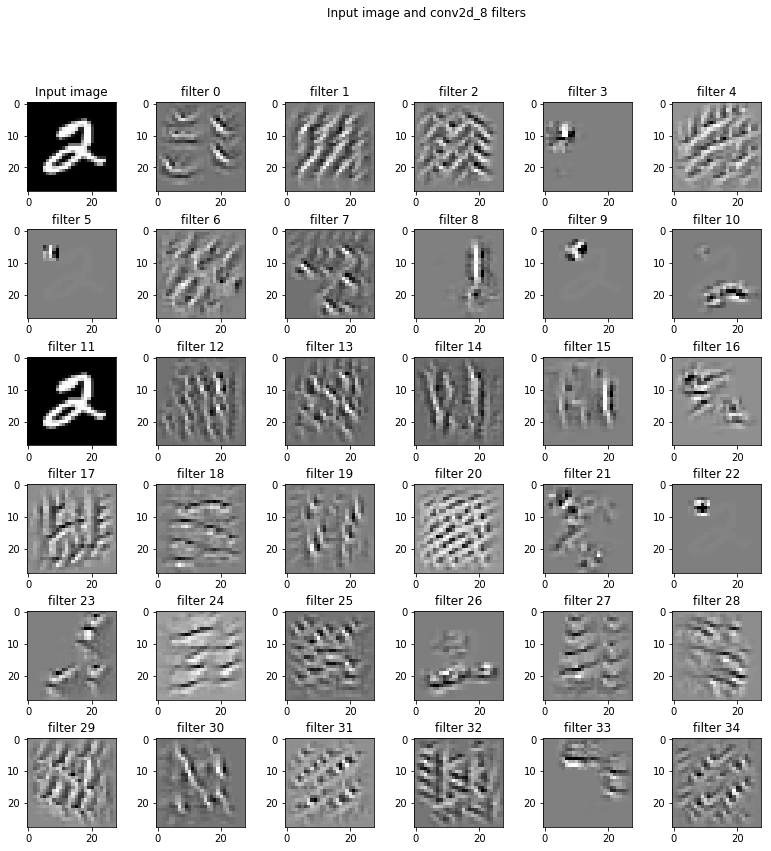

In [43]:
vis_img_in_filter(layer_name='conv2d_8')